In [15]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [16]:
real_label = pd.read_pickle('/kaggle/input/petfinder-yolov5-kfold-tfrecords/train.pkl')

In [17]:
real_label['Id'] = real_label['Id']+".jpg"
real_label

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,...,Pawpularity,file_path,n_pets,label,coords,x_min,x_max,y_min,y_max,pet_ratio
0,0007de18844b0dbbb5e1f607da0606e0.jpg,0,1,1,1,0,0,1,0,0,...,63,/kaggle/input/petfinder-pawpularity-score/trai...,3,dog,"[(120.58594, 114.75, 325.125, 474.75), (202.21...",202.21875,32.062500,114.750000,229.218750,0.346914
1,0009c66b9439883ba2750fb825e1d7db.jpg,0,1,1,0,0,0,0,0,0,...,42,/kaggle/input/petfinder-pawpularity-score/trai...,1,cat,"[(649.03125, 198.13593, 886.0687, 476.49374)]",649.03125,886.068726,198.135925,476.493744,0.082485
2,0013fd999caf9a3efe1352ca1b0d937e.jpg,0,1,1,1,0,0,0,0,1,...,28,/kaggle/input/petfinder-pawpularity-score/trai...,1,dog,"[(110.4375, 63.75, 575.25, 684.75)]",110.43750,575.250000,63.750000,684.750000,0.417773
3,0018df346ac9c1d8413cfcc888ca8246.jpg,0,1,1,1,0,0,0,0,0,...,15,/kaggle/input/petfinder-pawpularity-score/trai...,1,dog,"[(0.5625, 217.40625, 404.15625, 559.96875)]",0.56250,404.000000,217.406250,559.968750,0.473827
4,001dc955e10590d3ca4673f034feeef2.jpg,0,0,0,1,0,0,1,0,0,...,72,/kaggle/input/petfinder-pawpularity-score/trai...,2,dog,"[(51.1875, 218.625, 513.0, 651.375), (142.875,...",142.87500,513.000000,218.625000,377.625000,0.558559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57.jpg,0,0,0,1,0,0,0,0,0,...,15,/kaggle/input/petfinder-pawpularity-score/trai...,1,cat,"[(13.5, 58.125, 722.25, 837.0)]",13.50000,722.250000,58.125000,837.000000,0.731964
9908,ffcc8532d76436fc79e50eb2e5238e45.jpg,0,1,1,1,0,0,0,0,0,...,70,/kaggle/input/petfinder-pawpularity-score/trai...,1,dog,"[(218.0625, 169.875, 669.75, 725.625)]",218.06250,669.750000,169.875000,725.625000,0.362784
9909,ffdf2e8673a1da6fb80342fa3b119a20.jpg,0,1,1,1,0,0,0,0,1,...,20,/kaggle/input/petfinder-pawpularity-score/trai...,1,cat,"[(0.0, 12.95, 629.4, 889.0)]",0.00000,629.400024,12.950000,889.000000,0.884572
9910,fff19e2ce11718548fa1c5d039a5192a.jpg,0,1,1,1,0,0,0,0,1,...,20,/kaggle/input/petfinder-pawpularity-score/trai...,1,dog,"[(228.1875, 148.5, 660.75, 772.5)]",228.18750,660.750000,148.500000,772.500000,0.390000


In [18]:
#real_label['label'] = real_label['label'].replace(['dog'], 0)
#real_label['label'] = real_label['label'].replace(['cat'], 1)
#real_label['label'] = real_label['label'].replace(['unknow'], 2)
#real_label

In [19]:
real_label = real_label[real_label.label != "unknown"]

In [20]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)       

In [23]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [24]:
batch_size=10

In [25]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )

In [26]:
train_generator = train_datagen.flow_from_dataframe(real_label,
                                                    '../input/petfinder-pawpularity-score/train/',
                                                    x_col='Id',y_col='label',
                                                    target_size=Image_Size,
                                                    class_mode='categorical',
                                                    batch_size=batch_size)

Found 9884 validated image filenames belonging to 2 classes.


In [14]:
epochs=20
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    steps_per_epoch=real_label.shape[0]//batch_size,
    callbacks=[earlystop,learning_rate_reduction]
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-12-03 22:00:18.243251: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-12-03 22:00:21.116150: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


658/658 [==============================] - 228s 331ms/step - loss: 0.8970 - accuracy: 0.5677
Epoch 2/20
658/658 [==============================] - 155s 236ms/step - loss: 0.6713 - accuracy: 0.6235
Epoch 3/20
658/658 [==============================] - 156s 236ms/step - loss: 0.6284 - accuracy: 0.6597
Epoch 4/20
658/658 [==============================] - 155s 235ms/step - loss: 0.5969 - accuracy: 0.6959
Epoch 5/20
658/658 [==============================] - 155s 236ms/step - loss: 0.5741 - accuracy: 0.7126
Epoch 6/20
658/658 [==============================] - 155s 235ms/step - loss: 0.5494 - accuracy: 0.7264
Epoch 7/20
658/658 [==============================] - 156s 237ms/step - loss: 0.5356 - accuracy: 0.7392
Epoch 8/20
658/658 [==============================] - 157s 238ms/step - loss: 0.5153 - accuracy: 0.7506
Epoch 9/20
658/658 [==============================] - 155s 236ms/step - loss: 0.5136 - accuracy: 0.7496
Epoch 10/20
658/658 [==============================] - 157s 239ms/step - lo

In [47]:
model.save("model1_catsVSdogs_10epoch.h5")

In [ ]:
# test part

In [21]:
test_filenames = os.listdir("/kaggle/input/own-tests")

In [28]:
test = pd.read_csv('/kaggle/input/test-csv/test.csv')


,Id,true_label
0,IMG_0969.JPG,1
1,IMG_0982.JPG,0
2,IMG_0983.JPG,0
3,IMG_0968.JPG,1
4,IMG_0981.JPG,0
5,IMG_0980.JPG,0
6,IMG_0984.JPG,0
7,IMG_0985.JPG,0
8,IMG_0978.JPG,1
9,IMG_0979.JPG,0


In [29]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test, 
    '/kaggle/input/own-tests' ,
    x_col='Id',
    y_col=None,
    class_mode=None,
    target_size=(128,128),
    batch_size=batch_size,
    shuffle=False
    )

Found 29 validated image filenames.


In [30]:
nb_samples = test.shape[0]

In [32]:
predict = model.predict_generator(test_generator , steps = np.ceil(nb_samples/batch_size))
test['label'] = np.argmax(predict, axis= -1)
test

,Id,true_label,label
0,IMG_0969.JPG,1,1
1,IMG_0982.JPG,0,0
2,IMG_0983.JPG,0,0
3,IMG_0968.JPG,1,0
4,IMG_0981.JPG,0,1
5,IMG_0980.JPG,0,0
6,IMG_0984.JPG,0,0
7,IMG_0985.JPG,0,0
8,IMG_0978.JPG,1,1
9,IMG_0979.JPG,0,1


In [46]:
test.to_csv("conv2d_classification.csv")

Predicted   0  1
Actual          
0          12  3
1           5  9


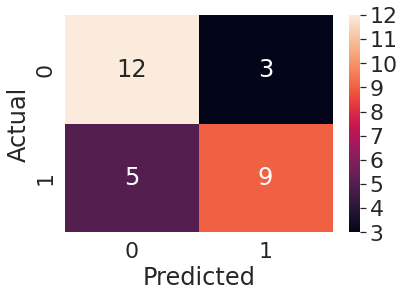

In [42]:
import seaborn as sn
confusion_matrix = pd.crosstab(test['true_label'], test['label'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
sn.set(font_scale=1.0)
plt.show()

In [44]:
import plotly.express as px

from sklearn.metrics import roc_curve, auc

y = test['true_label']
y_score = test['label']


fpr, tpr, thresholds = roc_curve(y, y_score)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()
